In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import matplotlib.gridspec as gridspec

In [48]:
products = ['AgERA5','ERA5','GEOS5']
metrics = ['bias','rmse','r2','pbias']
metric_labels = ['Bias','RMSE','r$^2$','PBias']
var_names = ['t_air','u','vp','ra','p_air']   
var_labels = ['Air temperature \n ($^\circ\mathrm{C}$)', 
              'Windspeed \n ($ms^{-1}$)',
            'Vapour pressure \n (mbar)',
              'Solar radiation \n ($Wm^{-2}$)',
              'Air pressure at surface \n (mbar)']

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ntr002\AppData\Local\Temp\ipykernel_4684\1321026476.py:5: SyntaxWarning: invalid escape sequence '\c'
  var_labels = ['Air temperature \n ($^\circ\mathrm{C}$)',


In [49]:
csv_path1=r'./data/validation_{0}2.csv'
csv_path2=r'./data/validation_{0}_ERA5grid.csv'

In [28]:
var_name = 'p_air'
csv1=csv_path1.format(var_name)
csv2=csv_path2.format(var_name)

In [29]:
df1= pd.read_csv(csv1,sep=';') 
df2= pd.read_csv(csv2,sep=';') 

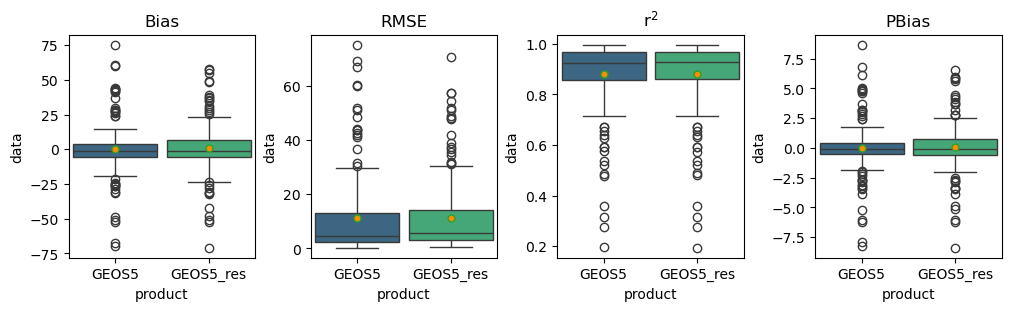

In [46]:

product = 'GEOS5'
product_res = 'GEOS5_res'
fig, axs = plt.subplots(1, 4, figsize=(10, 3), layout="constrained")
for j,metric in enumerate(metrics):
    data_dict={
    'product': [],
    'N': [],
    'station':[],
     'data': [],
    }
    for i,df in enumerate([df1,df2]):
        data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
        if i == 0:
            data_dict['product']+=list(itertools.repeat(product, len(df)))
        else:
            data_dict['product']+=list(itertools.repeat(product_res, len(df)))
        data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
        data_dict['station']+=list(df['Station'].values)
    data_dict
    df_all=pd.DataFrame(data_dict)
    df_all=df_all.dropna()   
    sns.boxplot(data=df_all,x='product', y='data', 
                ax=axs[j],
                hue="product",palette="viridis", 
                   width=0.9,
                showmeans=True,meanprops=dict(marker='o', markerfacecolor='darkorange',
                               markersize=5, zorder=3), 
                  )
    axs[j].set_title(metric_labels[j])

# GEOS5

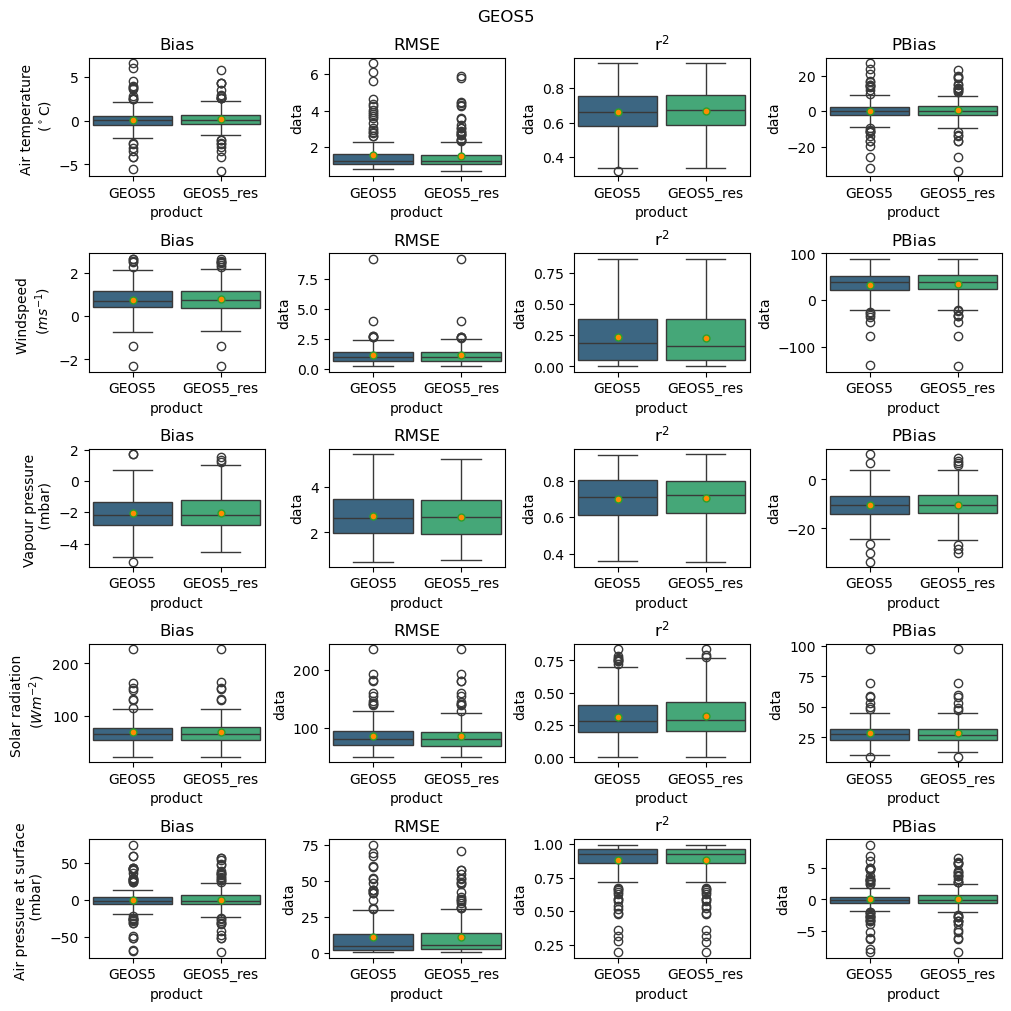

In [64]:
product = 'GEOS5'
product_res = 'GEOS5_res'
fig, axs = plt.subplots(5, 4, figsize=(10, 10), layout="constrained")
for i,var_name in enumerate(var_names):
    csv1=csv_path1.format(var_name)
    csv2=csv_path2.format(var_name)
    df1= pd.read_csv(csv1,sep=';') 
    df2= pd.read_csv(csv2,sep=';') 
    axs[i,0].set_ylabel(var_labels[i])
    for j,metric in enumerate(metrics):
        data_dict={
        'product': [],
        'N': [],
        'station':[],
         'data': [],
        }
        for k,df in enumerate([df1,df2]):
            data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
            if k == 0:
                data_dict['product']+=list(itertools.repeat(product, len(df)))
            else:
                data_dict['product']+=list(itertools.repeat(product_res, len(df)))
            data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
            data_dict['station']+=list(df['Station'].values)
        data_dict
        df_all=pd.DataFrame(data_dict)
        df_all=df_all.dropna()   
        sns.boxplot(data=df_all,x='product', y='data', 
                    ax=axs[i,j],
                    hue="product",palette="viridis", 
                       width=0.9,
                    showmeans=True,meanprops=dict(marker='o', markerfacecolor='darkorange',
                                   markersize=5, zorder=3), 
                      )
        axs[i,j].set_title(metric_labels[j])
plt.suptitle("GEOS5")
plt.savefig('./figures/GEOS5_res_origin_validation.png',bbox_inches='tight')

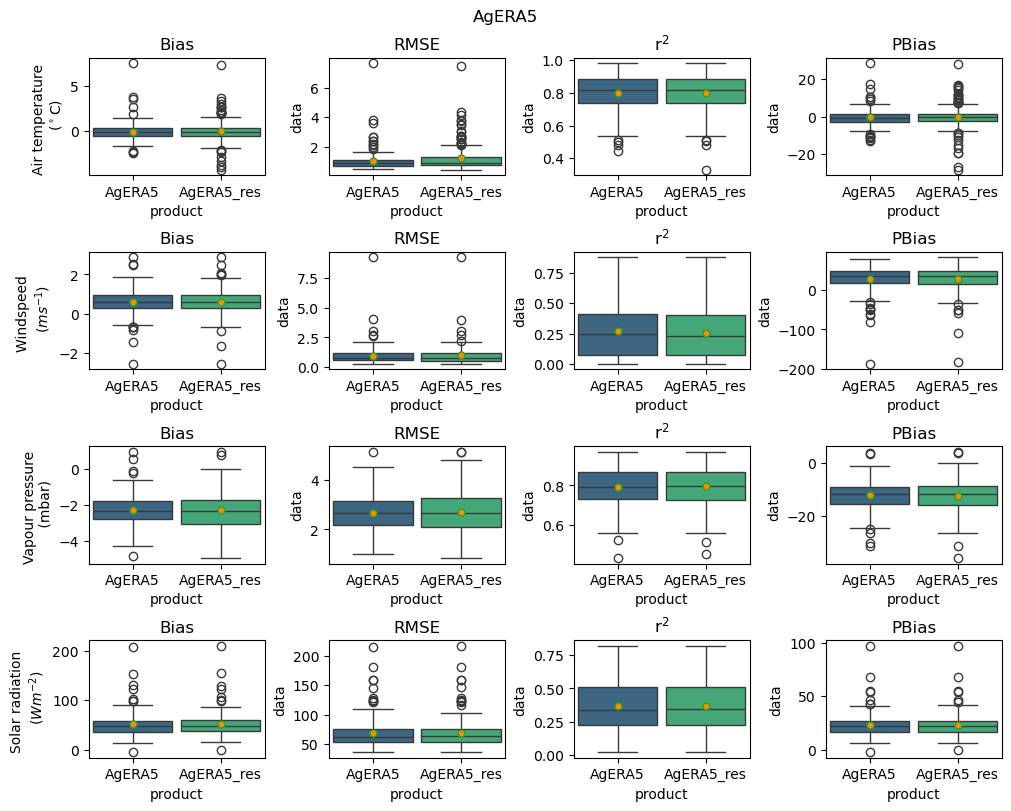

In [65]:
product = 'AgERA5'
product_res = 'AgERA5_res'
fig, axs = plt.subplots(4, 4, figsize=(10, 8), layout="constrained")
for i,var_name in enumerate(var_names[:-1]):
    csv1=csv_path1.format(var_name)
    csv2=csv_path2.format(var_name)
    df1= pd.read_csv(csv1,sep=';') 
    df2= pd.read_csv(csv2,sep=';') 
    axs[i,0].set_ylabel(var_labels[i])
    for j,metric in enumerate(metrics):
        data_dict={
        'product': [],
        'N': [],
        'station':[],
         'data': [],
        }
        for k,df in enumerate([df1,df2]):
            data_dict['N']+=list(df[f'{var_name}_{product}_N'].values)
            if k == 0:
                data_dict['product']+=list(itertools.repeat(product, len(df)))
            else:
                data_dict['product']+=list(itertools.repeat(product_res, len(df)))
            data_dict['data']+=list(df[f'{var_name}_{product}_{metric}'].values)
            data_dict['station']+=list(df['Station'].values)
        data_dict
        df_all=pd.DataFrame(data_dict)
        df_all=df_all.dropna()   
        sns.boxplot(data=df_all,x='product', y='data', 
                    ax=axs[i,j],
                    hue="product",palette="viridis", 
                       width=0.9,
                    showmeans=True,meanprops=dict(marker='o', markerfacecolor='darkorange',
                                   markersize=5, zorder=3), 
                      )
        axs[i,j].set_title(metric_labels[j])
plt.suptitle("AgERA5")
plt.savefig('./figures/AgERA5_res_origin_validation.png',bbox_inches='tight')